In [ ]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  #Mount Drive
  from google.colab import drive
  drive.mount('/content/gdrive')
  root_dir='/content/drive/MyDrive/Colab Notebooks/'
else:
  print('Not running on CoLab')
  root_dir='/root/my-project-env/drives/Colab Notebooks/'
  !ls


Running on CoLab
Mounted at /content/gdrive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import pd, plt and Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from prophet import Prophet

In [ ]:
data = pd.DataFrame(
    {
        "ds": pd.date_range(start="2023-01-01", periods=10, freq="D"),
        "y": [10, 12, 13, 14, 16, 14, 17, 20, 21, 18],
    }
)

model = Prophet()
model.fit(data)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

# Get the forecasted demand for the next period
forecasted_demand = forecast.loc[
    forecast["ds"] == future.iloc[-1]["ds"], "yhat"
].values[0]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/6lc6w0jz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/1av5atut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57376', 'data', 'file=/tmp/tmpeput7i_7/6lc6w0jz.json', 'init=/tmp/tmpeput7i_7/1av5atut.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelcquefne6/prophet_model-20230422053432.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:34:33 - cmdstanpy - INFO - Chain [1] start processing
INF

In [ ]:
forecasted_demands

array([21.39940372, 22.4720674 , 23.54473107, 24.61739474, 25.69005841,
       26.76272209, 27.83538576, 28.90804943, 29.9807131 , 31.05337678])

update based on these requirements: you have forecasted demand for the next 10 periods. It means we have 10 data points as forecasted_demands. Now, create a newsvendor model based on Kernel Density for these 10 data points and estimate the optimal order quantity.

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from scipy.stats import gaussian_kde

# Step 1: Forecast demand using Facebook Prophet (example with dummy data)
data = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
                     'y': [10, 12, 13, 14, 16, 14, 17, 20, 21, 18]})

model = Prophet()
model.fit(data)

future_periods = 10
future = model.make_future_dataframe(periods=future_periods)
forecast = model.predict(future)

# Get the forecasted demand for the next periods
forecasted_demands = forecast.loc[forecast['ds'].isin(future['ds'][-future_periods:]), 'yhat'].values

# Step 2: Estimate the probability distribution using Kernel Density Estimation on forecasted demands
kde = gaussian_kde(forecasted_demands)

# Step 3: Determine costs
cost_overstock = 5
cost_underage = 15

# Step 4: Calculate the critical fractile
critical_fractile = cost_underage / (cost_overstock + cost_underage)

# Step 5: Determine the optimal order quantity for the 10 periods
# Create a range of possible demand values
demand_range = np.linspace(min(forecasted_demands), max(forecasted_demands), num=1000)

# Calculate the cumulative density function (CDF) using the KDE
cdf = np.array([kde.integrate_box_1d(-np.inf, x) for x in demand_range])

# Find the optimal order quantity corresponding to the critical fractile
optimal_order_quantity = np.interp(critical_fractile, cdf, demand_range)

print(f"Optimal order quantity based on forecasted_demands: {optimal_order_quantity:.2f}")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/vwfl3iz7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/k5x9jsi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65803', 'data', 'file=/tmp/tmpeput7i_7/vwfl3iz7.json', 'init=/tmp/tmpeput7i_7/k5x9jsi1.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_model2fo5v055/prophet_model-20230422060150.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:01:50 - cmdstanpy - INFO - Chain [1] start processing
INF

Optimal order quantity based on forecasted_demands: 29.01


In [ ]:
fill_rate = kde.integrate_box_1d(-np.inf, optimal_order_quantity)
print(f"Fill rate: {fill_rate*100:.2f}%")

Fill rate: 75.00%


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from scipy.stats import gaussian_kde

# Step 1: Forecast demand using Facebook Prophet (example with dummy data)
data = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
                     'y': [10, 12, 13, 14, 16, 14, 17, 20, 21, 18]})

model = Prophet()
model.fit(data)

future_periods = 10
future = model.make_future_dataframe(periods=future_periods)
forecast = model.predict(future)

# Get the forecasted demand for the next periods
forecasted_demands = forecast.loc[forecast['ds'].isin(future['ds'][-future_periods:]), 'yhat'].values

# Step 2: Estimate the probability distribution using Kernel Density Estimation on forecasted demands
kde = gaussian_kde(forecasted_demands)

# Step 3: Determine costs
cost_overstock = 5
cost_underage = 15

# Set the target fill rate
target_fill_rate = 0.85

# Step 4: Calculate the critical fractile based on the target fill rate
critical_fractile = target_fill_rate

# Step 5: Determine the optimal order quantity for the 10 periods
# Create a range of possible demand values
demand_range = np.linspace(min(forecasted_demands), max(forecasted_demands), num=1000)

# Calculate the cumulative density function (CDF) using the KDE
cdf = np.array([kde.integrate_box_1d(-np.inf, x) for x in demand_range])

# Find the optimal order quantity corresponding to the critical fractile
optimal_order_quantity = np.interp(critical_fractile, cdf, demand_range)

print(f"Optimal order quantity based on forecasted_demands: {optimal_order_quantity:.2f}")

# Calculate the actual fill rate using the CDF at the optimal order quantity
fill_rate = kde.integrate_box_1d(-np.inf, optimal_order_quantity)
print(f"Fill rate: {fill_rate*100:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/_0ux34in.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/62sefaab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7752', 'data', 'file=/tmp/tmpeput7i_7/_0ux34in.json', 'init=/tmp/tmpeput7i_7/62sefaab.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelhjxeye9h/prophet_model-20230422060813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:08:13 - cmdstanpy - INFO - Chain [1] start processing
INFO

Optimal order quantity based on forecasted_demands: 30.30
Fill rate: 85.00%


To update the code to deliver a target fill rate of 85%, you can set the critical fractile to the desired fill rate and then calculate the optimal order quantity accordingly. Here's the updated code:

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from scipy.stats import gaussian_kde

# Step 1: Forecast demand using Facebook Prophet (example with dummy data)
data = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
                     'y': [10, 12, 13, 14, 16, 14, 17, 20, 21, 18]})

model = Prophet()
model.fit(data)

future_periods = 10
future = model.make_future_dataframe(periods=future_periods)
forecast = model.predict(future)

# Get the forecasted demand for the next periods
forecasted_demands = forecast.loc[forecast['ds'].isin(future['ds'][-future_periods:]), 'yhat'].values

# Step 2: Estimate the probability distribution using Kernel Density Estimation on forecasted demands
kde = gaussian_kde(forecasted_demands)

# Step 3: Determine costs
cost_overstock = 5
cost_underage = 15

# Set the target fill rate
target_fill_rate = 0.85

# Step 4: Calculate the critical fractile based on the target fill rate
critical_fractile = target_fill_rate

# Step 5: Determine the optimal order quantity for the 10 periods
# Create a range of possible demand values
demand_range = forecasted_demands

# Calculate the cumulative density function (CDF) using the KDE
cdf = np.array([kde.integrate_box_1d(-np.inf, x) for x in demand_range])

# Find the optimal order quantity corresponding to the critical fractile
optimal_order_quantity = np.interp(critical_fractile, cdf, demand_range)

print(f"Optimal order quantity based on forecasted_demands: {optimal_order_quantity:.2f}")

# Calculate the actual fill rate using the CDF at the optimal order quantity
fill_rate = kde.integrate_box_1d(-np.inf, optimal_order_quantity)
print(f"Fill rate: {fill_rate*100:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/45_4yxiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/hv2uspu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43834', 'data', 'file=/tmp/tmpeput7i_7/45_4yxiw.json', 'init=/tmp/tmpeput7i_7/hv2uspu_.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelgfl3spiu/prophet_model-20230422061322.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:13:22 - cmdstanpy - INFO - Chain [1] start processing
INF

Optimal order quantity based on forecasted_demands: 30.33
Fill rate: 85.20%


In [ ]:
forecasted_demands

array([21.39940372, 22.4720674 , 23.54473107, 24.61739474, 25.69005841,
       26.76272209, 27.83538576, 28.90804943, 29.9807131 , 31.05337678])

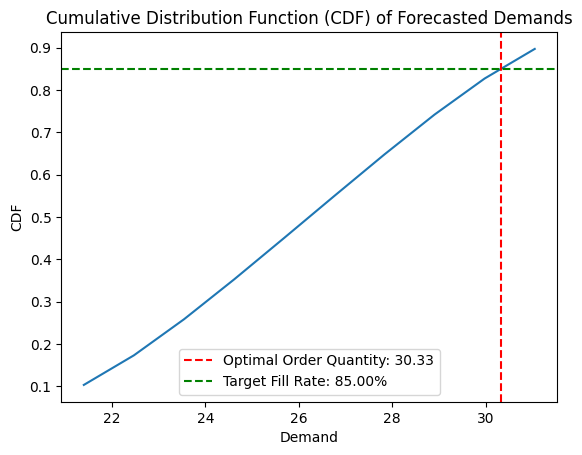

In [ ]:
import matplotlib.pyplot as plt

# Plot the CDF
plt.plot(demand_range, cdf)
plt.xlabel('Demand')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Forecasted Demands')

# Add a vertical line at the optimal order quantity
plt.axvline(optimal_order_quantity, color='r', linestyle='--', label=f"Optimal Order Quantity: {optimal_order_quantity:.2f}")

# Add a horizontal line at the target fill rate
plt.axhline(target_fill_rate, color='g', linestyle='--', label=f"Target Fill Rate: {target_fill_rate*100:.2f}%")

plt.legend()
plt.show()


Here's the updated code that follows your steps:

Randomly generate 10 values of 'y' from a uniform distribution between 2 and 8.
Record the results of 'optimal order quantity' and 'fill rate' in two separate lists.
Loop steps 1 and 2 for 10 iterations and add the updated 'optimal order quantity' and 'fill rate' to their corresponding lists.


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def generate_forecasted_demands():
    # Step 1: Randomly generate 10 values of 'y' from a uniform distribution between 2 and 8
    y_values = np.random.uniform(2, 8, size=10)
    
    data = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
                         'y': y_values})

    model = Prophet()
    model.fit(data)

    future_periods = 10
    future = model.make_future_dataframe(periods=future_periods)
    forecast = model.predict(future)

    # Get the forecasted demand for the next periods
    forecasted_demands = forecast.loc[forecast['ds'].isin(future['ds'][-future_periods:]), 'yhat'].values

    return forecasted_demands

def calculate_optimal_order_quantity_and_fill_rate(forecasted_demands, target_fill_rate):
    # Step 2: Estimate the probability distribution using Kernel Density Estimation on forecasted demands
    kde = gaussian_kde(forecasted_demands)

    # Step 3: Determine the optimal order quantity for the 10 periods
    # Create a range of possible demand values
    demand_range = np.linspace(min(forecasted_demands), max(forecasted_demands), num=1000)

    # Calculate the cumulative density function (CDF) using the KDE
    cdf = np.array([kde.integrate_box_1d(-np.inf, x) for x in demand_range])

    # Find the optimal order quantity corresponding to the target fill rate
    optimal_order_quantity = np.interp(target_fill_rate, cdf, demand_range)

    # Calculate the actual fill rate using the CDF at the optimal order quantity
    fill_rate = kde.integrate_box_1d(-np.inf, optimal_order_quantity)

    return optimal_order_quantity, fill_rate

# Initialize lists to store optimal order quantities and fill rates
optimal_order_quantities = []
fill_rates = []

# Set the target fill rate
target_fill_rate = 0.85

# Loop for 10 iterations
for _ in range(10):
    # Generate forecasted demands
    forecasted_demands = generate_forecasted_demands()
    
    # Calculate optimal order quantity and fill rate
    optimal_order_quantity, fill_rate = calculate_optimal_order_quantity_and_fill_rate(forecasted_demands, target_fill_rate)
    
    # Add the results to their corresponding lists
    optimal_order_quantities.append(optimal_order_quantity)
    fill_rates.append(fill_rate)

print(f"Optimal order quantities: {optimal_order_quantities}")
print(f"Fill rates: {np.array(fill_rates)*100}")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/g56a6ugt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/f6ougzn2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75767', 'data', 'file=/tmp/tmpeput7i_7/g56a6ugt.json', 'init=/tmp/tmpeput7i_7/f6ougzn2.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelt_58fhlm/prophet_model-20230422080042.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:00:42 - cmdstanpy - INFO - Chain [1] start processing
INF

Optimal order quantities: [8.144121908227616, 3.669964637618676, 5.439562002737389, 6.412431652325544, 10.68199671836771, 5.582011830208956, 3.3862510620960022, 7.80923164446514, 4.897287333743504, 5.456607034183189]
Fill rates: [85.00001652 85.00001652 85.00001652 85.00001652 85.00001652 85.00001652
 85.00001652 85.00001652 85.00001652 85.00001652]


Update the V1, In each iteration, the upper value of demand uniform distribution changes. The initial value is 16 and in each iteration a uniform random value between  -5 and 5.


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def generate_forecasted_demands(upper_bound):
    # Step 1: Randomly generate 10 values of 'y' from a uniform distribution between 2 and upper_bound
    y_values = np.random.uniform(2, upper_bound, size=10)
    
    data = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
                         'y': y_values})

    model = Prophet()
    model.fit(data)

    future_periods = 10
    future = model.make_future_dataframe(periods=future_periods)
    forecast = model.predict(future)

    # Get the forecasted demand for the next periods
    forecasted_demands = forecast.loc[forecast['ds'].isin(future['ds'][-future_periods:]), 'yhat'].values

    return forecasted_demands

def calculate_optimal_order_quantity_and_fill_rate(forecasted_demands, target_fill_rate):
    # Step 2: Estimate the probability distribution using Kernel Density Estimation on forecasted demands
    kde = gaussian_kde(forecasted_demands)

    # Step 3: Determine the optimal order quantity for the 10 periods
    # Create a range of possible demand values
    demand_range = np.linspace(min(forecasted_demands), max(forecasted_demands), num=1000)

    # Calculate the cumulative density function (CDF) using the KDE
    cdf = np.array([kde.integrate_box_1d(-np.inf, x) for x in demand_range])

    # Find the optimal order quantity corresponding to the target fill rate
    optimal_order_quantity = np.interp(target_fill_rate, cdf, demand_range)

    # Calculate the actual fill rate using the CDF at the optimal order quantity
    fill_rate = kde.integrate_box_1d(-np.inf, optimal_order_quantity)

    return optimal_order_quantity, fill_rate

# Initialize lists to store optimal order quantities and fill rates
optimal_order_quantities = []
fill_rates = []

# Set the target fill rate
target_fill_rate = 0.85

# Set the initial upper value of demand uniform distribution
initial_upper_bound = 16

# Loop for 10 iterations
for _ in range(10):
    # Update the upper value of the demand uniform distribution by adding a uniform random value between -5 and 5
    upper_bound = initial_upper_bound + np.random.uniform(-5, 5)
    
    # Generate forecasted demands
    forecasted_demands = generate_forecasted_demands(upper_bound)
    
    # Calculate optimal order quantity and fill rate
    optimal_order_quantity, fill_rate = calculate_optimal_order_quantity_and_fill_rate(forecasted_demands, target_fill_rate)
    
    # Add the results to their corresponding lists
    optimal_order_quantities.append(optimal_order_quantity)
    fill_rates.append(fill_rate)

print(f"Optimal order quantities: {optimal_order_quantities}")
print(f"Fill rates: {np.array(fill_rates)*100}")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/877nvjoc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/k3h7vjhi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93059', 'data', 'file=/tmp/tmpeput7i_7/877nvjoc.json', 'init=/tmp/tmpeput7i_7/k3h7vjhi.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelddutxs5_/prophet_model-20230422081103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:11:03 - cmdstanpy - INFO - Chain [1] start processing
INF

Optimal order quantities: [5.765853716426839, 11.666835796206875, 20.764755641489792, 8.127059722927068, 8.662360087099893, 10.042502880699294, 14.706124880072204, 11.339917768794951, 6.823957723353656, 5.795568495684569]
Fill rates: [85.00001652 85.00001652 85.00001652 85.00001652 85.00001652 85.00001652
 85.00001652 85.00001652 85.00001652 85.00001652]


update code: currently, in each iteration, fbprophet forecasts the next 10 demand points based on ONLY the demands of last iteration. Now, we want the fbprophet forecasts the next 10 demands based on all history of all iterations before the current iteration.


In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def generate_forecasted_demands(data, upper_bound):
    # Step 1: Randomly generate 10 values of 'y' from a uniform distribution between 2 and upper_bound
    y_values = np.random.uniform(2, upper_bound, size=10)
    
    # Append the new y_values to the existing data
    new_data = pd.DataFrame({'ds': pd.date_range(start=data['ds'].max() + pd.Timedelta(days=1), periods=10, freq='D'),
                             'y': y_values})
    data = data.append(new_data)

    model = Prophet()
    model.fit(data)

    future_periods = 10
    future = model.make_future_dataframe(periods=future_periods)
    forecast = model.predict(future)

    # Get the forecasted demand for the next periods
    forecasted_demands = forecast.loc[forecast['ds'].isin(future['ds'][-future_periods:]), 'yhat'].values

    return forecasted_demands, data

def calculate_optimal_order_quantity_and_fill_rate(forecasted_demands, target_fill_rate):
    # Step 2: Estimate the probability distribution using Kernel Density Estimation on forecasted demands
    kde = gaussian_kde(forecasted_demands)

    # Step 3: Determine the optimal order quantity for the 10 periods
    # Create a range of possible demand values
    demand_range = np.linspace(min(forecasted_demands), max(forecasted_demands), num=1000)

    # Calculate the cumulative density function (CDF) using the KDE
    cdf = np.array([kde.integrate_box_1d(-np.inf, x) for x in demand_range])

    # Find the optimal order quantity corresponding to the target fill rate
    optimal_order_quantity = np.interp(target_fill_rate, cdf, demand_range)

    # Calculate the actual fill rate using the CDF at the optimal order quantity
    fill_rate = kde.integrate_box_1d(-np.inf, optimal_order_quantity)

    return optimal_order_quantity, fill_rate

# Initialize lists to store optimal order quantities and fill rates
optimal_order_quantities = []
fill_rates = []

# Set the target fill rate
target_fill_rate = 0.85

# Set the initial upper value of demand uniform distribution
initial_upper_bound = 16

# Initialize the data with the first iteration's demand values
initial_y_values = np.random.uniform(2, initial_upper_bound, size=10)
data = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
                     'y': initial_y_values})

# Loop for 9 more iterations (total 10 iterations)
for _ in range(9):
    # Update the upper value of the demand uniform distribution by adding a uniform random value between -5 and 5
    upper_bound = initial_upper_bound + np.random.uniform(-5, 5)
    
    # Generate forecasted demands and update the data
    forecasted_demands, data = generate_forecasted_demands(data, upper_bound)

    
    # Calculate optimal order quantity and fill rate
    optimal_order_quantity, fill_rate = calculate_optimal_order_quantity_and_fill_rate(forecasted_demands, target_fill_rate)
    
    # Add the results to their corresponding lists
    optimal_order_quantities.append(optimal_order_quantity)
    fill_rates.append(fill_rate)

print(f"Optimal order quantities: {optimal_order_quantities}")
print(f"Fill rates: {np.array(fill_rates)*100}")


<ipython-input-33-85cc10abe90f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_data)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/be14inig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/l0dc0ksp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53564', 'data', 'file=/tmp/tmpeput7i_7/be14inig.json', 'init=/tmp/tmpeput7i_7/l0dc0ksp.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelty5hnk69/prophet_model-20230422083224.csv', 'method=optimi

Optimal order quantities: [11.756541090498459, 9.788673891884887, 7.746789915553943, 7.809673674396883, 11.675209294080156, 13.056004041034077, 12.016292652820054, 13.496368838585305, 10.796032421203996]
Fill rates: [85.00001622 85.00000878 85.0000266  85.00001076 85.00001169 85.00000562
 85.00000991 85.0000067  84.7226798 ]


In [ ]:
import json

# Initialize the dictionary to store results
results_dict = {
    'target_fill_rate': target_fill_rate,
    'upper_bounds': [],
    'y_values': [],
    'forecasted_demands': [],
    'optimal_order_quantities': [],
    'fill_rates': [],
}

import pandas as pd
import numpy as np
from prophet import Prophet
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def generate_forecasted_demands(data, lower_bound, upper_bound):
    # Step 1: Randomly generate 10 values of 'y' from a uniform distribution between 2 and upper_bound
    y_values = np.random.uniform(lower_bound, upper_bound, size=10)
    
    # Append the new y_values to the existing data
    new_data = pd.DataFrame({'ds': pd.date_range(start=data['ds'].max() + pd.Timedelta(days=1), periods=10, freq='D'),
                             'y': y_values})
    data = data.append(new_data)

    #model = Prophet()
    model = Prophet(interval_width=0.99, daily_seasonality=True)
    #model = Prophet(
    #interval_width=0.95,
    #growth="linear",
    #seasonality_mode="multiplicative",
    #yearly_seasonality=False,
    #daily_seasonality=False,
    #weekly_seasonality=False,
    #)

    model.fit(data)

    future_periods = 10
    future = model.make_future_dataframe(periods=future_periods)
    forecast = model.predict(future)

    # Get the forecasted demand for the next periods
    forecasted_demands = forecast.loc[forecast['ds'].isin(future['ds'][-future_periods:]), 'yhat'].values

    return forecasted_demands, data

def calculate_optimal_order_quantity_and_fill_rate(forecasted_demands, target_fill_rate):
    # Step 2: Estimate the probability distribution using Kernel Density Estimation on forecasted demands
    kde = gaussian_kde(forecasted_demands)

    # Step 3: Determine the optimal order quantity for the 10 periods
    # Create a range of possible demand values
    demand_range = np.linspace(min(forecasted_demands), max(forecasted_demands), num=1000)

    # Calculate the cumulative density function (CDF) using the KDE
    cdf = np.array([kde.integrate_box_1d(-np.inf, x) for x in demand_range])

    # Find the optimal order quantity corresponding to the target fill rate
    optimal_order_quantity = np.interp(target_fill_rate, cdf, demand_range)

    # Calculate the actual fill rate using the CDF at the optimal order quantity
    fill_rate = kde.integrate_box_1d(-np.inf, optimal_order_quantity)

    return optimal_order_quantity, fill_rate

# Initialize lists to store optimal order quantities and fill rates
optimal_order_quantities = []
fill_rates = []

# Set the target fill rate
target_fill_rate = 0.85


# Set the initial upper value of demand uniform distribution
initial_upper_bound = 15
initial_lower_bound = 14

upper_bound = initial_upper_bound
lower_bound=initial_lower_bound

# Initialize the data with the first iteration's demand values
initial_y_values = np.random.uniform(initial_lower_bound, initial_upper_bound, size=10)
data = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
                     'y': initial_y_values})
results_dict['y_values'].append(initial_y_values.tolist())

# Loop for 9 more iterations (total 10 iterations)
for _ in range(100):
    # Update the upper value of the demand uniform distribution by adding a uniform random value between -5 and 5
    if _%10==0:
      upper_bound = upper_bound + np.random.uniform(0, 1.2)
      lower_bound = lower_bound + np.random.uniform(0, 0.8)
    results_dict['upper_bounds'].append(upper_bound)
    
    # Generate forecasted demands and update the data
    forecasted_demands, data = generate_forecasted_demands(data, lower_bound, upper_bound)
    results_dict['forecasted_demands'].append(forecasted_demands.tolist())
    
    # Calculate optimal order quantity and fill rate
    optimal_order_quantity, fill_rate = calculate_optimal_order_quantity_and_fill_rate(forecasted_demands, target_fill_rate)
    
    # Add the results to their corresponding lists
    optimal_order_quantities.append(optimal_order_quantity)
    fill_rates.append(fill_rate)

    # Append the new y_values to the results dictionary
    new_y_values = data['y'].iloc[-10:].values
    results_dict['y_values'].append(new_y_values.tolist())

results_dict['optimal_order_quantities'] = optimal_order_quantities
results_dict['fill_rates'] = (np.array(fill_rates) * 100).tolist()

print("optimal order quantities = ", results_dict['optimal_order_quantities'])

# Save the results dictionary to a JSON file
with open('results.json', 'w') as outfile:
    json.dump(results_dict, outfile)


<ipython-input-129-323ec69e9be5>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_data)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/j8540hoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/ld5frbyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94999', 'data', 'file=/tmp/tmpeput7i_7/j8540hoa.json', 'init=/tmp/tmpeput7i_7/ld5frbyj.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelm_nt7lkj/prophet_model-20230422142109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
INF

optimal order quantities =  [14.701402047665123, 15.304275352187702, 14.729488534199287, 14.909008577203828, 15.066540681937633, 14.906224294544833, 14.881060674817615, 14.938176131534098, 14.844609711117679, 14.75684912722463, 15.40151132151132, 15.595769021409716, 15.613236239487849, 15.39706501703454, 15.285441415943707, 15.307295326920377, 15.283054909477775, 15.389848118103423, 15.503888676477825, 15.560163576706318, 15.722852364894061, 15.893739952588277, 15.935755050606426, 15.973101003282238, 16.003802469223032, 15.976112147946639, 15.924878030004711, 15.913045430228552, 15.84561154714553, 15.742601172421656, 15.895600857334493, 15.968552100387491, 16.004565669514317, 16.057985880016837, 16.11095294401936, 16.053977993452577, 16.13858705842305, 16.14953187774541, 16.15515896713416, 16.20520098525469, 16.413279288561597, 16.569121078806543, 16.709036747650728, 16.833012929949515, 16.93891176123638, 16.98241691399695, 16.92266435518953, 16.98161033989214, 16.971047860138892, 16.9

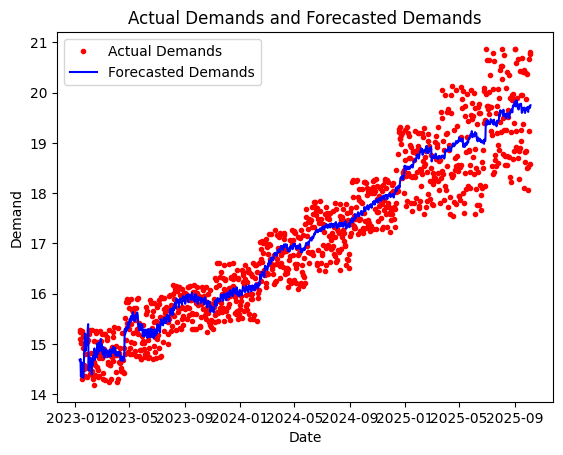

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# Read the data from the saved JSON file
with open('results.json', 'r') as infile:
    results_dict = json.load(infile)

# Prepare actual demand data
actual_demands = np.array(results_dict['y_values'][1:]).flatten()
actual_dates = pd.date_range(start='2023-01-11', periods=len(actual_demands), freq='D')

# Prepare forecasted demand data
forecasted_demands = np.array(results_dict['forecasted_demands']).flatten()
forecasted_dates = pd.date_range(start='2023-01-11', periods=len(forecasted_demands), freq='D')

# Plot the actual demands and forecasted demands
fig, ax = plt.subplots()
ax.plot(actual_dates, actual_demands, 'r.', label='Actual Demands')
ax.plot(forecasted_dates, forecasted_demands, 'b-', label='Forecasted Demands')
ax.set_title("Actual Demands and Forecasted Demands")
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
ax.legend(loc='best')
plt.show()


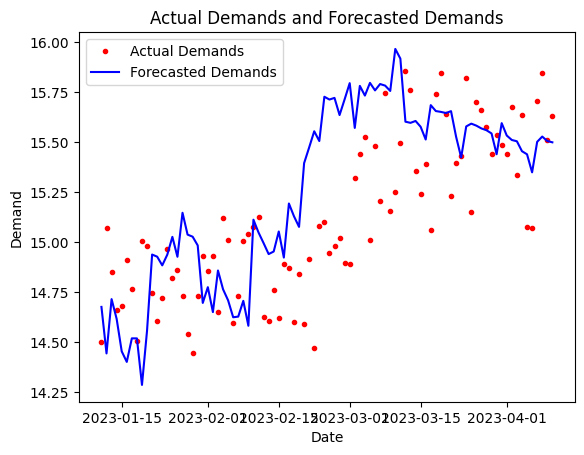

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the saved JSON file
with open('results.json', 'r') as infile:
    results_dict = json.load(infile)

# Extract y-values from periods 1-9 (ignoring period 0)
y_values_periods_1_9 = results_dict['y_values'][1:10]

# Flatten the list
y_values_flat = [y for sublist in y_values_periods_1_9 for y in sublist]

# Extract forecasted_demands from periods 1-9 (ignoring period 0)
forecasted_demands_periods_1_9 = results_dict['forecasted_demands'][1:10]

# Flatten the list
forecasted_demands_flat = [y for sublist in forecasted_demands_periods_1_9 for y in sublist]

# Prepare dates for the graph
dates = pd.date_range(start='2023-01-11', periods=len(y_values_flat), freq='D')

# Plot the actual demands and forecasted demands
fig, ax = plt.subplots()
ax.plot(dates, y_values_flat, 'r.', label='Actual Demands')
ax.plot(dates, forecasted_demands_flat, 'b-', label='Forecasted Demands')
ax.set_title("Actual Demands and Forecasted Demands")
ax.set_xlabel("Date")
ax.set_ylabel("Demand")
ax.legend(loc='best')
plt.show()


In [ ]:
len(y_values_flat)

90

In [ ]:
from prophet import Prophet

In [ ]:
Prophet.__version__

AttributeError: ignored

In [ ]:
import numpy as np
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [ ]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

# Getting stock data from Yahoo into FB Prophet



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/oza73sey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/j_b4c5va.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40284', 'data', 'file=/tmp/tmpeput7i_7/oza73sey.json', 'init=/tmp/tmpeput7i_7/j_b4c5va.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelv1jzusk_/prophet_model-20230422052708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:27:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:27:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:

model = Prophet(
    interval_width=0.95,
    growth="linear",
    seasonality_mode="multiplicative",
    yearly_seasonality=False,
    daily_seasonality=False,
    weekly_seasonality=False,
)
model.fit(
    pd.DataFrame(
        {
            "y": [5478, -2869],
            "ds": pd.date_range(start="2018-04-01", end="2018-05-01", freq="MS"),
        }
    )
)

INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/ps6ry9az.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeput7i_7/qlkdsxxd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97159', 'data', 'file=/tmp/tmpeput7i_7/ps6ry9az.json', 'init=/tmp/tmpeput7i_7/qlkdsxxd.json', 'output', 'file=/tmp/tmpeput7i_7/prophet_modelzsiww4ec/prophet_model-20230422052716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:27:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:27:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
05:27:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error during processing Communicati

RuntimeError: ignored

In [ ]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2023-01-01  10.672767    9.043358   12.442323    10.672767    10.672767   
1  2023-01-02  11.745431   10.004227   13.419656    11.745431    11.745431   
2  2023-01-03  12.818094   11.129708   14.503233    12.818094    12.818094   
3  2023-01-04  13.890758   12.231217   15.566348    13.890758    13.890758   
4  2023-01-05  14.963422   13.194136   16.655278    14.963422    14.963422   
5  2023-01-06  16.036085   14.187915   17.778508    16.036085    16.036085   
6  2023-01-07  17.108749   15.366372   18.873842    17.108749    17.108749   
7  2023-01-08  18.181413   16.542260   19.868685    18.181413    18.181413   
8  2023-01-09  19.254076   17.525147   20.854842    19.254076    19.254076   
9  2023-01-10  20.326740   18.621460   21.931818    20.326740    20.326740   
10 2023-01-11  21.399404   19.744075   23.121597    21.399404    21.399404   
11 2023-01-12  22.472067   20.670696   24.178970    22.472067    22.472067   
12 2023-01-13  23.544731   21.986329   25.182152    23.544731    23.544731   
13 2023-01-14  24.617395   22.848703   26.357377    24.617395    24.617395   
14 2023-01-15  25.690058   23.979225   27.513203    25.690058    25.690059   
15 2023-01-16  26.762722   25.137548   28.494615    26.762722    26.762722   
16 2023-01-17  27.835386   26.039575   29.627208    27.835385    27.835386   
17 2023-01-18  28.908049   27.296286   30.593714    28.908049    28.908050   
18 2023-01-19  29.980713   28.266802   31.687584    29.980712    29.980714   
19 2023-01-20  31.053377   29.301313   32.809391    31.053376    31.053378   

    additive_terms  additive_terms_lower  additive_terms_upper  \
0              0.0                   0.0                   0.0   
1              0.0                   0.0                   0.0   
2              0.0                   0.0                   0.0   
3              0.0                   0.0                   0.0   
4              0.0                   0.0                   0.0   
5              0.0                   0.0                   0.0   
6              0.0                   0.0                   0.0   
7              0.0                   0.0                   0.0   
8              0.0                   0.0                   0.0   
9              0.0                   0.0                   0.0   
10             0.0                   0.0                   0.0   
11             0.0                   0.0                   0.0   
12             0.0                   0.0                   0.0   
13             0.0                   0.0                   0.0   
14             0.0                   0.0                   0.0   
15             0.0                   0.0                   0.0   
16             0.0                   0.0                   0.0   
17             0.0                   0.0                   0.0   
18             0.0                   0.0                   0.0   
19             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   
5                    0.0                         0.0   
6                    0.0                         0.0   
7                    0.0                         0.0   
8                    0.0                         0.0   
9                    0.0                         0.0   
10                   0.0                         0.0   
11                   0.0                         0.0   
12                   0.0                         0.0   
13                   0.0                         0.0   
14                   0.0                         0.0   
15                   0.0                         0.0   
16                   0.0         

In [ ]:

# Python
import pandas as pd
from fbprophet import Prophet

from pandas_datareader import data as web
import datetime

import pandas as pd
import matplotlib.pyplot as plt

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

from datetime import timedelta

import matplotlib.pyplot as plt

#stock = 'spy'
#yesterday = pd.to_datetime("today")-1
#print(yesterday)
#endDate = pd.to_datetime("today")
#start_date = (datetime.datetime.now() - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#start_date = (endDate - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#print(start_date)
#df = web.DataReader(stock, data_source='yahoo', start=start_date,end=endDate)
#df = web.DataReader(stock, data_source='yahoo', start=start_date)
#date is the index so you need to make it a column
#df["Date"] = df.index

stock='^GSPC'




start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1) 
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

df = df.loc[:, ['Close']]
#df_GSPC = df_GSPC.pct_change().dropna()

plt.plot(df['Close'])
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/SPY_time_series_forecasting/images/SPY.png')


ModuleNotFoundError: ignored

In [ ]:
df.tail()

Close
Date                   
2021-01-21  3853.070068
2021-01-22  3841.469971
2021-01-25  3855.360107
2021-01-26  3849.620117
2021-01-27  3750.770020

In [ ]:
df.head()

Close
Date                 
1927-12-30  17.660000
1928-01-03  17.760000
1928-01-04  17.719999
1928-01-05  17.549999
1928-01-06  17.660000

In [ ]:
#date is the index so you need to make it a column
df["Date"] = df.index
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


In [ ]:
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds         yhat   yhat_lower   yhat_upper
23525 2021-06-23  2810.392043  2621.261054  3011.187004
23526 2021-06-24  2810.786811  2620.353446  2978.421755
23527 2021-06-25  2810.743603  2597.348683  2999.062025
23528 2021-06-26  2809.567479  2640.741112  3002.894067
23529 2021-06-27  2809.821792  2618.684444  3014.155975

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [ ]:
plot_components_plotly(m, forecast)


# Future feature: Retrieve stocks from Google Sheet run FB *Prophet*

In [ ]:
# Python
import pandas as pd
from fbprophet import Prophet

#Import data from sheets

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


INFO:oauth2client.client:Refreshing access_token


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1zZ0hH8IC-z8mhKx1oJblo_innQiwPO7Y0BKZCzqznsY/edit#gid=0')

sheet = wb.worksheet('Data')

data = sheet.get_all_values()

df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]


df.head()


0               Date    Open    High  ...   Volume               Date  Close
1  2/1/2016 16:00:00  750.46  757.86  ...  5139157  2/1/2016 16:00:00  24.11
2  2/2/2016 16:00:00   784.5  789.87  ...  6348126  2/2/2016 16:00:00  23.62
3  2/3/2016 16:00:00  770.22   774.5  ...  6171019  2/3/2016 16:00:00  24.09
4  2/4/2016 16:00:00  722.81     727  ...  5168709  2/4/2016 16:00:00  24.15
5  2/5/2016 16:00:00  703.87  703.99  ...  5105725  2/5/2016 16:00:00  23.51

[5 rows x 8 columns]

In [ ]:
# Python
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")
df.head()




0                 ds    Open    High  ...   Volume                 ds      y
1  2/1/2016 16:00:00  750.46  757.86  ...  5139157  2/1/2016 16:00:00  24.11
2  2/2/2016 16:00:00   784.5  789.87  ...  6348126  2/2/2016 16:00:00  23.62
3  2/3/2016 16:00:00  770.22   774.5  ...  6171019  2/3/2016 16:00:00  24.09
4  2/4/2016 16:00:00  722.81     727  ...  5168709  2/4/2016 16:00:00  24.15
5  2/5/2016 16:00:00  703.87  703.99  ...  5105725  2/5/2016 16:00:00  23.51

[5 rows x 8 columns]

In [ ]:
m = Prophet()
m.fit(df)

ValueError: ignored

In [ ]:
# Python
future = m.make_future_dataframe(periods=2)
future.tail()

In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# Python
fig1 = m.plot(forecast)

In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [ ]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# Python
plot_components_plotly(m, forecast)
